In [ ]:
import tensorflow as tf
import numpy as np
import random

In [ ]:
x_data = np.random.rand(100).astype(np.float32)
y_data=x_data*0.1 +0.3 

# Structure

In [ ]:
Weights = tf.Variable(tf.random_uniform([1],-1.0,1.0))
biases= tf.Variable(tf.zeros([1]))
y=Weights*x_data + biases

loss=tf.reduce_mean(tf.square(y-y_data))
optimizer =tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init=tf.global_variables_initializer()

In [ ]:
sess=tf.Session()
sess.run(init)
for setp in range(200):
    sess.run(train)
    if setp % 20 == 0:
            print(setp,sess.run(Weights),sess.run(biases))

# Session

In [ ]:
import tensorflow as tf
matrix1 = tf.constant([[3,3]])
matrix2 = tf.constant([[2],
                      [2]])
product = tf.matmul(matrix1,matrix2)



In [ ]:
sess= tf.Session()
result= sess.run(product)

print(result)
sess.close()

In [ ]:

with tf.Session() as sess:
    result2 = sess.run(product)
    print(result2)

# Vairable 

In [ ]:
state=tf.Variable(0,name='counter')
one=tf.constant(1)

new_value=tf.add(state,one)
update=tf.assign(state,new_value)

init= tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

# placeholder 

In [ ]:
input1= tf.placeholder(tf.float32)
input2= tf.placeholder(tf.float32)

output=tf.multiply(input1,input2)

with tf.Session() as sess:
    print(sess.run(output, feed_dict={input1:[7.], input2:[2.]}))

# Acitivation Function & Adding layers

In [44]:
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
def add_layer(inputs, in_size, out_size, activation_function=None):
    # add one more layer and return the output of this layer
    with tf.name_scope('layer'):
        with tf.name_scope('weights'):
            Weights = tf.Variable(
            tf.random_normal([in_size, out_size]), 
            name='W')
        with tf.name_scope('biases'):
            biases = tf.Variable(
            tf.zeros([1, out_size]) + 0.1, 
            name='b')
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.add(
            tf.matmul(inputs, Weights), 
            biases)
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b, )
        return outputs

In [25]:
x_data = np.linspace(-1,1,300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

In [43]:
with tf.name_scope('input'):
    xs=tf.placeholder(tf.float32,[None,1],name='x_input')
    ys=tf.placeholder(tf.float32,[None,1],name='y_input')


l1=add_layer(xs,1,10,activation_function=tf.nn.relu)
prediction=add_layer(l1,10,1,activation_function=None)

with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                     reduction_indices=[1]))
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

0.22296527
0.012354017
0.007271517
0.005051361
0.0041350434
0.003669665
0.0034291237
0.0032815163
0.003180256
0.0031137206
0.0030745724
0.0030526498
0.0030383938
0.0030291579
0.003022571
0.0030158146
0.003008533
0.0030021537
0.0029981495
0.002991835


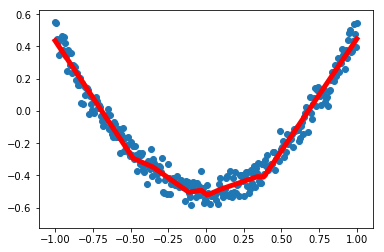

In [37]:
init = tf.global_variables_initializer()
sess = tf.Session()
writer=tf.summary.FileWriter("logs/",sess.graph)
sess.run(init)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to see the step improvement
        print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(0.1)
plt.show()

In [ ]:
# tensorboard --logdir logs

# visualize the data 